<a href="https://colab.research.google.com/github/royam0820/fastai2-v4/blob/master/06_Linear_Regression_and_SGD_(short).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression & Gradient Descent

In [ ]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

We are going to see Pytorch feature such as:

- How to create an array
- How to change things in an array
- How to do matrix operations on an array

In [ ]:
# number of rows for our dataset
n=100

In [ ]:
# creating an array also called a tensor.
# generating a rank 2 tensor of 100 rows and 2 columns
x = torch.ones(n,2) ; len(x)

100

In [ ]:
# viewing 5 rows
x[:5]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
type(x)

torch.Tensor

In [ ]:
x.type()

'torch.FloatTensor'

NOTE:  We are creating a rank 2 tensor of n by 2.  n = 100, so the size of the tensor is 100 rows.

The number of rows will be n (100) and the number of columns will be 2. In there, every single float number in it will be a 1 (1.)﹣that's what `torch.ones` means.

You can index into that just like you can index into a list in Python. `x[:5]` will give 5 rows from index 0 to 4.

In [ ]:
# changing values in place in a tensor `_`
# applying uniform random numbers from -1 to 1 for column 0
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.2394,  1.0000],
        [-0.9818,  1.0000],
        [ 0.9117,  1.0000],
        [ 0.3088,  1.0000],
        [ 0.0039,  1.0000]])

NOTE1:
- `x[:,0]` means every single row of column 0. 
- So `x[:,0].uniform_(-1.,1)` is every row of column 0, use a uniform random numbers between -1 to 1. 
- `_` means to replace the value in place.

In [ ]:
# finding the tensor shape and its number of axes
x.shape, x.ndim

(torch.Size([100, 2]), 2)

In [ ]:
# creating the parameters (also called weights, coefficients)
a = tensor(3.,2); a

tensor([3., 2.])

NOTE:  We are creating **parameters** (also called coefficients), `a[0]` will be 3 (i.e.: the slope) and `a1:1` will be 2 (i.e.: the intercept of a line (y=ax+b).  

"tensor" means array, but specifically it's an array of a regular shape. So it's not an array where row 1 has two things, row 3 has three things, and row 4 has one thing, what you call a "jagged array". 

In [ ]:
a.shape, a.ndim

(torch.Size([2]), 1)

In [ ]:
# doing the matrix operations on the array. Matrix product between x and a.
# adding random values to add a bit of noise
y = x@a + torch.rand(n) 

NOTE: And then we're going to do this x@a. 

x@a in Pytorch means a matrix product between x and a. And it actually is even more general than that. It can be a vector vector product, a matrix vector product, a vector matrix product, or a matrix matrix product. 

In PyTorch, specifically, it can mean even more general things where we get into higher rank tensors which we will learn all about very soon. But this is basically the key thing that's going to go on in all of our deep learning. The vast majority of the time, our computers are going to be basically doing this﹣multiplying numbers together and adding them up which is the surprisingly useful thing to do.

[matrix multiplication](http://matrixmultiplication.xyz/)

NOTE: Then I can do a scatter plot. I'm not really interested in my scatter plot in this column of ones (the second column  (index 1) with 1 in it are not part of the graph). They are just there to make my linear function more convenient. So I'm just going to plot my zero index column against my y's.

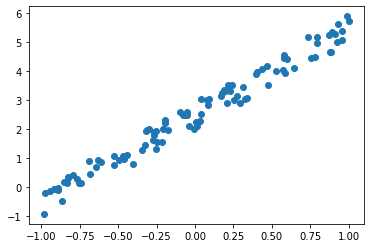

In [ ]:
# plotting 
plt.scatter(x[:,0], y);

NOTE:  Now what we're going to do is, we are going to pretend we were given this data and we don't know that the values of our coefficients are 3 and 2. So we're going to pretend that we never knew that and we have to figure them out. How would we figure them out? How would we draw a line to fit this data and why would that even be interesting? Well, we're going to look at more about why it's interesting in just a moment. 

But the basic idea is: ** If we can find a way to find those two parameters to fit that line to those 100 points, we can also fit these arbitrary functions that convert from pixel values to probabilities.**

It will turn out that this techniques that we're going to learn to find these two numbers works equally well for the 50 million numbers in ResNet34!!!

In [ ]:
y.shape, y.ndim

(torch.Size([100]), 1)

In [ ]:
# defining the loss function
def mse(y_hat, y): return ((y_hat-y)**2).mean()

NOTE: 
`y_hat`is the prediction
`y` is the actual value

So the value of mean squared error is simply the difference between those two values `(y_hat-y)` squared. Then we can take the mean.

Because both `y_hat` and `y` are rank 1 tensors, so we subtract one vector from another vector, it does something called "**element-wise arithmetic**"

`mse` is a loss function. This is something that tells us how good our line is. Now we have to come up with what is the line that fits through here. Remember, we are going to pretend we don't know. So what you actually have to do is you have to guess. You actually have to come up with a guess what are the values of a_1 and a_2. So let's say we guess that a_1 and a_2 are -1 and 1.



You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [ ]:
a = tensor(-1.,1); a

tensor([-1.,  1.])

NOTE: values inside the tensor are float values, i.e.: -1. is -1.0

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

NOTE:  So now we can calculate our predictions with this random guess. x@a a matrix product of x and a. And we can now calculate the mean squared error of our predictions and their actuals, and that's our loss. So for this regression, our loss is 0.9.

In [ ]:
# y_hat = our slope.
y_hat = x@a
mse(y_hat, y)


tensor(7.5547)

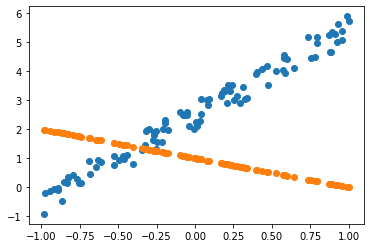

In [ ]:
# scatter plot
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [ ]:
a

tensor([-1.,  1.])

NOTE: So that is not great﹣not surprising. It's just a guess. 

It's basically about taking this guess and trying to make it a little bit better. How do we make it a little better? Well, there are only two numbers the intercept and the gradient of the orange line. So what we are going to do with gradient descent is we're going to simply say:

- What if we changed those two numbers a little bit?
  - What if we made the intercept a little bit higher or a little bit lower?
  - What if we made the gradient a little bit more positive or a little bit more negative?
  
For that, we can actually calculate the **derivative** (or **gradient**). The derivative is the thing that tells you would moving it up or down make it better, or would rotating it this way or that way make it better.  The gradient or the derivative tells you how changing a_1 up or down would change our MSE, how changing a_2 up or down would change our MSE, and this does it more quickly than actually moving it up and down.

So far we have specified the *model* (**linear regression**) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here, the gradient descent is implemented in [PyTorch](http://pytorch.org/).

In [ ]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [ ]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

NOTE:  So here is what we're going to do. We are going to create a loop. We're going to loop through 100 times, and we're going to call a function called update. That function is going to:

Calculate y_hat (i.e. our prediction)

Calculate loss (i.e. our mean squared error)

From time to time, it will print that out so we can see how we're going

`a.sub_(lr * a.grad` is the "coefficients ﹣ learning rate times gradient". And we will learn about some easy but important optimization we can do to make this go faster.

`a.grad.zero_()` is zeroing out the gradient and other involving making sure that you turn gradient calculation off when you do the SGD update.

You will find something that says "coefficients ﹣ learning rate times gradient". And we will learn about some easy but important optimization we can do to make this go faster.`

**Calculate the gradient**. In PyTorch, calculating the gradient is done by using a method called `backward`. Mean squared error was just a simple standard mathematical function. PyTorch keeps track of how it was calculated and lets us calculate the derivative. So if you do a mathematical operation on a tensor in PyTorch, you can call backward to calculate the derivative and the derivative gets stuck inside an attribute called `.grad`.

Take my coefficients and I'm going to subtract from them my gradient (sub_). There is an underscore there because that's going to do it in-place. It's going to actually update those coefficients a to subtract the gradients from them. Why do we subtract? Because the gradient tells us if I move the whole thing downwards, the loss goes up. If I move the whole thing upwards, the loss goes down. So I want to do the opposite of the thing that makes it go up. We want our loss to be small. That's why we subtract.

lr is our learning rate. All it is is the thing that we multiply by the gradient. Why is there any lr at all? Let me show you why.

NOTE: `with torch.no_grad` Pytorch keeps track of all operations that you carry over your tensors. Thats why you do not need to write your own derivatives; `backward()` takes care of that. But while updating your parameters, you dont want to keep track of those steps (ie. `param=param - lr*grad)` because otherwise, the next time you call .`backward()`, the model will also take derivative with respect to the update steps. Therefore, to temporarily disable tracking of the operations, we use `torch.no_grad`. 

In [ ]:
lr = 1e-1
for t in range(100): 
  update()

tensor(7.5547, grad_fn=<MeanBackward0>)
tensor(1.4200, grad_fn=<MeanBackward0>)
tensor(0.4158, grad_fn=<MeanBackward0>)
tensor(0.1628, grad_fn=<MeanBackward0>)
tensor(0.0974, grad_fn=<MeanBackward0>)
tensor(0.0805, grad_fn=<MeanBackward0>)
tensor(0.0762, grad_fn=<MeanBackward0>)
tensor(0.0750, grad_fn=<MeanBackward0>)
tensor(0.0747, grad_fn=<MeanBackward0>)
tensor(0.0747, grad_fn=<MeanBackward0>)


NOTE:  If we run update 100 times printing out the loss from time to time, you can see it starts at 8.9, and it goes down.

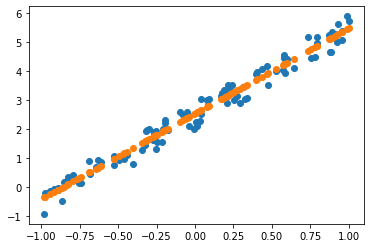

In [ ]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],to_np(x@a))

NOTE:  That's it! Believe it or not, that's gradient descent. So we just need to start with a function that's a bit more complex than x@a but as long as we have a function that can represent things like if this is a teddy bear, we now have a way to fit it.

## Animate it!

Let's now take a look at this as an animation. This is one of the nice things that you can do with matplotlib. You can take any plot and turn it into an animation. So you can now actually see it updating each step.

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], to_np(x@a))
plt.close()

def animate(i):
    update()
    line.set_ydata(to_np(x@a))
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

**Mini Batches**: for the example above, we have calculated the gradient descent for the whole data set.  But if your dataset is 1.5 million images in ImageNet, that's going to be really slow. Just to do a single update of your parameters, you've got to calculate the loss on 1.5 million images. You wouldn't want to do that. So what we do is we grab 64 images or so at a time at random, and we calculate the loss on those 64 images, and we update our weights. Then we have another 64 random images, and we update our weights. In other words, the loop basically looks exactly the same but add some random indexes on our x and y to do a mini-batch at a time, and that would be the basic difference.

NOTE:  Let's see what we did here. We simply said, as before, create a scatter plot, but then rather than having a loop, we used matplotlib's `FuncAnimation` to call 100 times this animate function. And this function just calls that update we created earlier then update the y data in our line. Repeat that 100 times, waiting 20 milliseconds after each one.

Once you add those grab a random few points each time, those random few points are called your mini-batch, and that approach is called **SGD** for **Stochastic Gradient Descent**.

# Homework
Try running this notebook with a really big learning rate, with a really small learning rate, and see what this animation looks like, and try to get a feel for it. Maybe you can even try a 3D plot. I haven't tried that yet, but I'm sure it would work fine.

# Vocabulary

- **Learning rate**: A number we multiply our gradient by to decide how much to update the weights by.

- **Epoch**: One complete run through all of our data points (e.g. all of our images). So for non-stochastic gradient descent we just did, every single loop, we did the entire dataset. But if you've got a dataset with a thousand images and our mini-batch size is 100, then it would take you 10 iterations to see every image once. So that would be one epoch. Epochs are important because if you do lots of epochs, then you are looking at your images lots of times, so every time you see an image, there's a bigger chance of overfitting. So we generally don't want to do too many epochs.

- **Mini-batch**: A random bunch of points that you use to update your weights.

- **SGD**: Stochastic Gradient descent using mini-batches.

- **Model / Architecture**: They kind of mean the same thing. In this case, our architecture is \vec{y} = X\vec{a}﹣ the architecture is the mathematical function that you're fitting the parameters to. And we're going to learn later today or next week what the mathematical function of things like ResNet34 actually is. But it's basically pretty much what you've just seen. It's a bunch of matrix products.

- **Parameters** / Coefficients / Weights: Numbers that you are updating.

- **Loss function**: The thing that's telling you how far away or how close you are to the correct answer. For classification problems, we use cross entropy loss, also known as negative log likelihood loss. This penalizes incorrect confident predictions, and correct unconfident predictions.
For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.

# Ressources - To know more

[Introduction to Gradient Descent Algorithm](https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/)

[Derivative and Basic Rules](https://www.khanacademy.org/math/differential-calculus/dc-diff-intro)

[Optimizing Gradient Descent](https://ruder.io/optimizing-gradient-descent/)